In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# housing data files
data = "Data/redfin_texas_counties.csv"

df = pd.read_csv(data)

print('Num of rows:', len(df))
df.head()

Num of rows: 2573


,Unnamed: 0,period_begin,period_end,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,county
0,139,2012-01-01,2012-01-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,152500.0,0.155303,...,0.043478,-0.164855,-0.096307,0.400000,-0.400000,0.066667,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
1,299,2019-05-01,2019-05-31,"Williamson County, TX",Texas,TX,Condo/Co-op,3,237000.0,0.013904,...,0.212766,-0.187234,-0.103024,0.571429,-0.211180,0.071429,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
2,474,2019-06-01,2019-06-30,"Williamson County, TX",Texas,TX,Single Family Residential,6,291000.0,-0.029863,...,0.336561,0.040325,-0.032895,0.505759,-0.006931,0.056208,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
3,505,2012-04-01,2012-04-30,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,154950.0,0.029568,...,0.113636,-0.021499,-0.069462,0.571429,0.171429,0.428571,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
4,1400,2015-08-01,2015-08-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,219000.0,0.120205,...,NaN,NaN,NaN,0.777778,0.215278,0.777778,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County


In [3]:
df.columns

Index(['Unnamed: 0', 'period_begin', 'period_end', 'region', 'state',
       'state_code', 'property_type', 'property_type_id', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price',
       'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf',
       'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'median_dom', 'median_dom_mom',
       'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom',
       'avg_sale_to_list_yoy', 'sold_above_list', 'sold_above_list_mom',
       'sold_above_list_yoy', 'price_drops', 'price_drops_mom',
       'price_drops_yoy', 'o

In [4]:
# ALL RESIDENTIAL Filter
austin_df = df.loc[(df['property_type'] == 'All Residential')]
#OR
austin_df = df.loc[(df['property_type_id'] == -1)]


#Creating a year column.  
austin_df['year'] = pd.DatetimeIndex(austin_df['period_end']).year

#Filter on #2018-2022
years = [2018, 2019, 2020, 2021, 2022]
austin_df = austin_df.loc[austin_df['year'].isin(years)]

# Let's make sure 'date' is actually a date in pandas
austin_df["date"] = pd.to_datetime(austin_df["period_end"])



C:\Users\zarbi\AppData\Local\Temp\ipykernel_49900\2846613268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austin_df['year'] = pd.DatetimeIndex(austin_df['period_end']).year


In [7]:
#group by counties and look at year over year trend

# Let's make sure 'date' is actually a date in pandas
austin_df["date"] = pd.to_datetime(austin_df["period_end"])

In [32]:
#all residential inventory sum by month
#inventory_df = austin_df.loc[austin_df['property_type_id'] == -1]

inventory_df = austin_df

In [56]:
inventory = austin_df.groupby(['date'])['inventory'].sum()
inventory_df = pd.DataFrame(inventory)
inventory_df.reset_index(inplace=True)

In [59]:
inventory_df.head()

,date,inventory
0,2018-01-31,5930.0
1,2018-02-28,6184.0
2,2018-03-31,6867.0
3,2018-04-30,7427.0
4,2018-05-31,8149.0


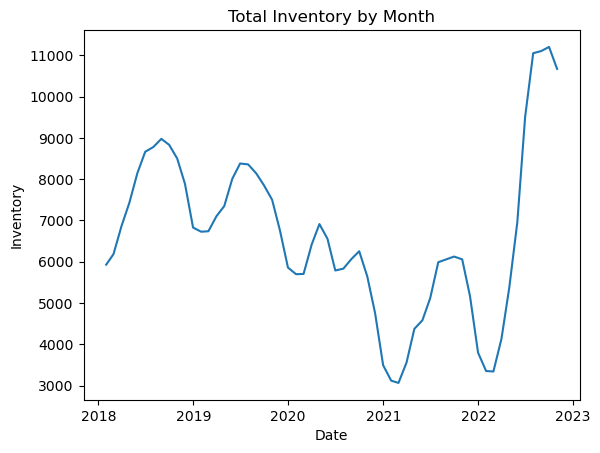

In [60]:
# Generate a line plot 

# Generate a line plot of inventory over time
x_axis = inventory_df['date']
y_axis = inventory_df['inventory']

plt.clf()  #clear Pyplot figure

plt.title(f"Total Inventory by Month")
plt.xlabel("Date")
plt.ylabel("Inventory")
plt.plot(x_axis, y_axis)

# Show the graph that we have created
plt.show()